# 0.1 Load and Store Data

## Summary
Load datasets, provide summary information, and store to relevant target directory.

## Changes
- 01/18/2020: v0.2 Mitchell Abrams
    - Generate subsets for target analyses
- 01/16/2020: v0.1 Mitchell Abrams

### Configure working environment
Enable import of modules and scripts in tld of project hierarchy

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

### Imports

In [2]:
%reload_ext autoreload
%autoreload 2

import pandas as pd

from pathlib import Path

import logging
logger = logging.getLogger("distributed.utils_perf")
logger.setLevel(logging.ERROR)

from dask.distributed import Client

from src.data.load_data import *
from src.data.load_data_new import convert_all_hdf5

pd.set_option('precision', 3)
pd.set_option('display.max_columns', 999)

### Load in data

In [4]:
# Launch Dask pool
client = Client('tcp://127.0.0.1:63286')
client

<Client: 'tcp://127.0.0.1:63286' processes=4 threads=8, memory=34.31 GB>

In [101]:
client.restart()

distributed.nanny - WARNING - Worker process still alive after 1 seconds, killing


<Client: 'tcp://127.0.0.1:63045' processes=0 threads=0, memory=0 B>

In [15]:
convert_all_hdf5(client)

ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+----------+--------+----------+
| Column   | Found  | Expected |
+----------+--------+----------+
| MCARR_ID | object | float64  |
+----------+--------+----------+

The following columns also raised exceptions on conversion:

- MCARR_ID
  ValueError("could not convert string to float: '04AZ0654823'")

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'MCARR_ID': 'object'}

to the call to `read_csv`/`read_table`.

### Complete Dataset, 1975-2018
Script only loads the `PERSON`, `ACCIDENT`, and `VEHICLE` tables. Default configuration is to load a subset of columns, and to perform pre-processing on the data.

In [86]:
people_75_18, vehicles_75_18, accidents_75_18 = get_data_dask(client=client, start_year=1975, end_year=2018)
people_75_18.reset_index(inplace=True)
vehicles_75_18.reset_index(inplace=True)
accidents_75_18.reset_index(inplace=True)

distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 46% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 46% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 47% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

In [95]:
#people_75_18.reset_index(inplace=True)
#vehicles_75_18.reset_index(inplace=True)
#accidents_75_18.reset_index(inplace=True)

dout_path = Path(module_path) / "data" / "intermediate" /  "full" 
dout_path.mkdir(parents = True, exist_ok=True)

people_75_18.to_feather(Path(dout_path) / "people.ftr")
vehicles_75_18.to_feather(Path(dout_path) / "vehicles.ftr")
accidents_75_18.to_feather(Path(dout_path) / "accidents.ftr")

people_75_18.to_hdf(Path(dout_path) / "full_set.h5", key='people', mode='w', format='table')
vehicles_75_18.to_hdf(Path(dout_path) / "full_set.h5", key='vehicles', mode='a', format='table')
accidents_75_18.to_hdf(Path(dout_path) / "full_set.h5", key='accidents', mode='a', format='table')

people_75_18.to_hdf(Path(dout_path) / "people.h5", key='df', format='table')
vehicles_75_18.to_hdf(Path(dout_path) / "vehicles.h5", key='df', format='table')
accidents_75_18.to_hdf(Path(dout_path) / "accidents.h5", key='df', format='table')

distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)


In [97]:
people_75_18.head()

level_0  index  VEH_NO  PER_NO  AGE SEX    PER_TYP     SEAT_POS  REST_USE  \
0        0      0       1       1   20   1     Driver       Driver  Not Used   
1        1      1       2       1   27   1     Driver       Driver  Not Used   
2        2      2       3       1   81   1     Driver       Driver  Not Used   
3        3      3       1       1   17   1     Driver       Driver   Unknown   
4        4      4       1       2   20   1  Passenger  Front Right   Unknown   

   AIR_BAG             INJ_SEV  ST_CASE  YEAR   DEAD         PER_ID  \
0  Unknown  No Apparent Injury    10001  1975  False  7510001001001   
1  Unknown     Suspected Minor    10001  1975  False  7510001002001   
2  Unknown               Fatal    10001  1975   True  7510001003001   
3       NA               Fatal    10002  1975   True  7510002001001   
4       NA   Suspected Serious    10002  1975  False  7510002001002   

       VEH_ID       ID  
0  7510001001  7510001  
1  7510001002  7510001  
2  7510001003  7510001  
3  7510002001  7510002  
4  7510002001  7510002

### Subset: 1975-1998
This subset is the version used by Leonard Evans (CITE). Script only loads the `PERSON`, `ACCIDENT`, and `VEHICLE` tables. Default configuration is to load a subset of columns, and to perform pre-processing on the data.

In [102]:
people_75_98, vehicles_75_98, accidents_75_98 = get_data_dask(client=client, start_year=1975, end_year=1998)

people_75_98.reset_index(inplace=True)
vehicles_75_98.reset_index(inplace=True)
accidents_75_98.reset_index(inplace=True)

distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)


In [103]:
dout_path = Path(module_path) / "data" / "intermediate" /  "l_evans_75-98" 
dout_path.mkdir(parents = True, exist_ok=True)

people_75_98.to_feather(Path(dout_path) / "people.ftr")
vehicles_75_98.to_feather(Path(dout_path) / "vehicles.ftr")
accidents_75_98.to_feather(Path(dout_path) / "accidents.ftr")

people_75_98.to_hdf(Path(dout_path) / "l_evans.h5", key='people', mode='w', format='table')
vehicles_75_98.to_hdf(Path(dout_path) / "l_evans.h5", key='vehicles', mode='a', format='table')
accidents_75_98.to_hdf(Path(dout_path) / "l_evans.h5", key='accidents', mode='a', format='table')

people_75_98.to_hdf(Path(dout_path) / "people.h5", key='df', format='table')
vehicles_75_98.to_hdf(Path(dout_path) / "vehicles.h5", key='df', format='table')
accidents_75_98.to_hdf(Path(dout_path) / "accidents.h5", key='df', format='table')

### Subset: 1999-2018
Script only loads the `PERSON`, `ACCIDENT`, and `VEHICLE` tables. Default configuration is to load a subset of columns, and to perform pre-processing on the data.

In [104]:
people_99_18, vehicles_99_18, accidents_99_18 = get_data_dask(client=client, start_year=1999, end_year=2018)

people_99_18.reset_index(inplace=True)
vehicles_99_18.reset_index(inplace=True)
accidents_99_18.reset_index(inplace=True)

distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


In [105]:
dout_path = Path(module_path) / "data" / "intermediate" /  "subset_99-18" 
dout_path.mkdir(parents = True, exist_ok=True)

people_99_18.to_feather(Path(dout_path) / "people.ftr")
vehicles_99_18.to_feather(Path(dout_path) / "vehicles.ftr")
accidents_99_18.to_feather(Path(dout_path) / "accidents.ftr")

people_99_18.to_hdf(Path(dout_path) / "subset_99-18.h5", key='people', mode='w', format='table')
vehicles_99_18.to_hdf(Path(dout_path) / "subset_99-18.h5", key='vehicles', mode='a', format='table')
accidents_99_18.to_hdf(Path(dout_path) / "subset_99-18.h5", key='accidents', mode='a', format='table')

people_99_18.to_hdf(Path(dout_path) / "people.h5", key='df', format='table')
vehicles_99_18.to_hdf(Path(dout_path) / "vehicles.h5", key='df', format='table')
accidents_99_18.to_hdf(Path(dout_path) / "accidents.h5", key='df', format='table')

### Subset: 2015-2018
Script only loads the `PERSON`, `ACCIDENT`, and `VEHICLE` tables. Default configuration is to load a subset of columns, and to perform pre-processing on the data.

In [106]:
people_15_18, vehicles_15_18, accidents_15_18 = get_data_dask(client=client, start_year=2015, end_year=2018)

people_15_18.reset_index(inplace=True)
vehicles_15_18.reset_index(inplace=True)
accidents_15_18.reset_index(inplace=True)

In [107]:
dout_path = Path(module_path) / "data" / "intermediate" /  "subset_15-18" 
dout_path.mkdir(parents = True, exist_ok=True)

people_15_18.to_feather(Path(dout_path) / "people.ftr")
vehicles_15_18.to_feather(Path(dout_path) / "vehicles.ftr")
accidents_15_18.to_feather(Path(dout_path) / "accidents.ftr")

people_15_18.to_hdf(Path(dout_path) / "subset_15-18.h5", key='people', mode='w', format='table')
vehicles_15_18.to_hdf(Path(dout_path) / "subset_15-18.h5", key='vehicles', mode='a', format='table')
accidents_15_18.to_hdf(Path(dout_path) / "subset_15-18.h5", key='accidents', mode='a', format='table')

people_15_18.to_hdf(Path(dout_path) / "people.h5", key='df', format='table')
vehicles_15_18.to_hdf(Path(dout_path) / "vehicles.h5", key='df', format='table')
accidents_15_18.to_hdf(Path(dout_path) / "accidents.h5", key='df', format='table')

### Subset: Detailed VIN (2013-2018)
Script loads the `PERSON`, `ACCIDENT`, `VEHICLE`, and `VINDECODE` tables. Default configuration is to load a subset of columns, and to perform pre-processing on the data.

In [108]:
people_vin, vehicles_vin, accidents_vin = get_data_dask(client=client, start_year=2013, end_year=2018, detailed_vin=True)

people_vin.reset_index(inplace=True)
vehicles_vin.reset_index(inplace=True)
accidents_vin.reset_index(inplace=True)

In [109]:
dout_path = Path(module_path) / "data" / "intermediate" /  "detailed_vin" 
dout_path.mkdir(parents = True, exist_ok=True)

people_vin.to_hdf(Path(dout_path) / "detailed_vin.h5", key='people', mode='w', format='table')
vehicles_vin.to_hdf(Path(dout_path) / "detailed_vin-18.h5", key='vehicles', mode='a', format='table')
accidents_vin.to_hdf(Path(dout_path) / "detailed_vin-18.h5", key='accidents', mode='a', format='table')

people_vin.to_hdf(Path(dout_path) / "people.h5", key='df', format='table')
vehicles_vin.to_hdf(Path(dout_path) / "vehicles.h5", key='df', format='table')
accidents_vin.to_hdf(Path(dout_path) / "accidents.h5", key='df', format='table')

TypeError: Cannot serialize the column [CARBBRLS] because
its data contents are [mixed] object dtype

distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


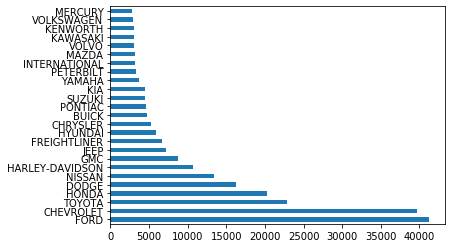

In [11]:
vehicles['VINMAKE_T'].value_counts()[0:25].plot(kind='barh')

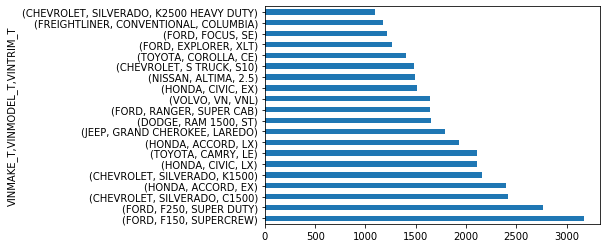

In [48]:
s = vehicles['VINTRIM_T'].groupby([vehicles['VINMAKE_T'], vehicles['VINMODEL_T']]).value_counts()
s.sort_values(ascending=False)[0:20].plot(kind='barh')

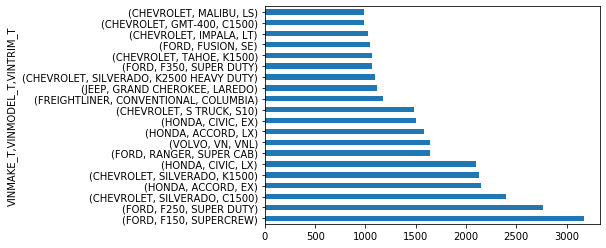

In [54]:
s = vehicles[vehicles['VINTRIM1_T'].isna() & vehicles['VINTRIM2_T'].isna() & vehicles['VINTRIM3_T'].isna() & vehicles['VINTRIM4_T'].isna()]
s = s['VINTRIM_T'].groupby([vehicles['VINMAKE_T'], vehicles['VINMODEL_T']]).value_counts()
s.sort_values(ascending=False)[0:20].plot(kind='barh')

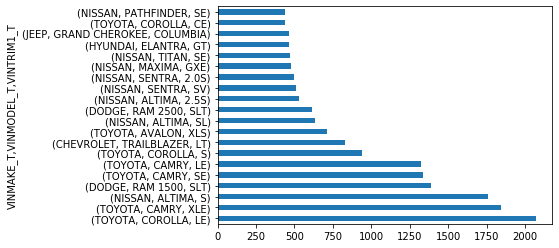

In [52]:
s = vehicles['VINTRIM1_T'].groupby([vehicles['VINMAKE_T'], vehicles['VINMODEL_T']]).value_counts()
s.sort_values(ascending=False)[0:20].plot(kind='barh')

In [59]:
vehicles.groupby(['VINTRIM_T', 'VINMAKE_T', 'VINMODEL_T']).size().unstack().plot(kind='bar', stacked=True)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000026D0104D708> (for post_execute):


Exception ignored in: <bound method GCDiagnosis._gc_callback of <distributed.utils_perf.GCDiagnosis object at 0x0000026D79CAD648>>
Traceback (most recent call last):
  File "C:\Users\Mitchell\AppData\Roaming\Python\Python37\site-packages\distributed\utils_perf.py", line 186, in _gc_callback
    if info["generation"] != 2:
KeyboardInterrupt: 


KeyboardInterrupt: 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
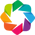

:Bars   [VINMODEL_T,VINMAKE_T]   (TRIMVIN)

In [89]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh','matplotlib')

s = vehicles['VINTRIM1_T'].groupby([vehicles['VINMAKE_T'], vehicles['VINMODEL_T']]).value_counts()
groupedDF = pd.DataFrame(s.sort_values(ascending=False)[0:50]).rename(columns={"VINTRIM1_T": 'TRIMVIN'})

key_dims = [('VINMODEL_T', 'MODEL'), ('VINMAKE_T', 'MAKE')]
val_dims = [('TRIMVIN', 'TRIM')]

macro = hv.Table(groupedDF, key_dims, val_dims)

bars = macro.to.bars(['MODEL', 'MAKE'], 'TRIM', [])
bars.opts(opts.Bars(color=hv.Cycle('Category20'), show_legend=False, stacked=True, tools=['hover'], width=600, xrotation=90))


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
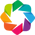

:Bars   [VINMAKE_T,VINMODEL_T,VINTRIM_T]   (TRIMVIN)

In [253]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh','matplotlib')

s = vehicles[vehicles['VINTRIM1_T'].isna() & vehicles['VINTRIM2_T'].isna() & vehicles['VINTRIM3_T'].isna() & vehicles['VINTRIM4_T'].isna()]
s = s['VINTRIM_T'].groupby([vehicles['VINMAKE_T'], vehicles['VINMODEL_T']]).value_counts()
groupedDF = pd.DataFrame(s.sort_values(ascending=False)[0:50]).rename(columns={"VINTRIM_T": 'TRIMVIN'})

key_dims = [('VINTRIM_T', 'TRIM'), ('VINMODEL_T', 'MODEL'), ('VINMAKE_T', 'MAKE')]
val_dims = [('TRIMVIN', 'TRIM2')]

macro = hv.Table(groupedDF, key_dims, val_dims)

bars = macro.to.bars(['MAKE', 'MODEL', 'TRIM'], 'TRIM2', [])
bars.opts(opts.Bars(color=hv.Cycle('Category20'), show_legend=False, tools=['hover'], width=600, xrotation=90))

In [312]:
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.palettes import GnBu3, OrRd3, Magma256, inferno, viridis
from bokeh.transform import factor_cmap

s = vehicles[vehicles['VINTRIM1_T'].isna() & vehicles['VINTRIM2_T'].isna() & vehicles['VINTRIM3_T'].isna() & vehicles['VINTRIM4_T'].isna()]
s = s.groupby([s['VINMAKE_T'], s['VINMODEL_T']])#['VINTRIM_T']#.value_counts().sort_values(ascending=False)[0:50].rename(columns={"VINTRIM_T": 'TRIMVIN'})

cur = s['VINTRIM_T'].value_counts().sort_values(ascending=False)[0:50].rename(columns={"VINTRIM_T": 'TRIMVIN'})

#print(cur.unstack())
df = pd.DataFrame(cur.sort_values(ascending=False)[0:50]).rename(columns={0:'TRIMVIN'}).unstack().fillna(0)

source = ColumnDataSource(df)

x= list(source.data.keys())[1:]
print(x)



p = figure(x_range = FactorRange(*source.data['VINMAKE_T_VINMODEL_T']), plot_height=400, plot_width=1000,
           tools='hover', tooltips="$name @VINMAKE_T_VINMODEL_T: @$name")

cmap = factor_cmap(x, palette=GnBu3, factors=sorted(x))

p.vbar_stack(stackers = x, x='VINMAKE_T_VINMODEL_T', source=source,
             width=0.5, line_color='black', fill_color=viridis(29))

p.y_range.start = 0
p.x_range.range_padding = 0.01
p.xgrid.grid_line_color = None
#p.xaxis.axis_label = "Manufacturer grouped by # Cylinders"
p.xaxis.major_label_orientation = "vertical"
p.outline_line_color = None

show(p)

['TRIMVIN_SUPERCREW', 'TRIMVIN_SUPER DUTY', 'TRIMVIN_C1500', 'TRIMVIN_EX', 'TRIMVIN_K1500', 'TRIMVIN_LX', 'TRIMVIN_SUPER CAB', 'TRIMVIN_VNL', 'TRIMVIN_S10', 'TRIMVIN_COLUMBIA', 'TRIMVIN_LAREDO', 'TRIMVIN_K2500 HEAVY DUTY', 'TRIMVIN_SE', 'TRIMVIN_LT', 'TRIMVIN_LS', 'TRIMVIN_T800', 'TRIMVIN_K1500 LT', 'TRIMVIN_XLT', 'TRIMVIN_CUSTOM', 'TRIMVIN_FLD120', 'TRIMVIN_SRW SUPER DUTY', 'TRIMVIN_GT', 'TRIMVIN_LIMITED', 'TRIMVIN_POLICE INTERCEPTOR', 'TRIMVIN_EXL', 'TRIMVIN_SXT', 'TRIMVIN_GLS', 'TRIMVIN_W900', 'TRIMVIN_RR']


In [311]:
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.palettes import GnBu3, OrRd3, Magma256, inferno, viridis
from bokeh.transform import factor_cmap

#s = vehicles[vehicles['VINTRIM1_T'].isna() & vehicles['VINTRIM2_T'].isna() & vehicles['VINTRIM3_T'].isna() & vehicles['VINTRIM4_T'].isna()]
s = vehicles.groupby([vehicles['VINMAKE_T'], vehicles['VINMODEL_T']])#['VINTRIM_T']#.value_counts().sort_values(ascending=False)[0:50].rename(columns={"VINTRIM_T": 'TRIMVIN'})

cur = s['VINTRIM_T'].value_counts().sort_values(ascending=False)[0:50].rename(columns={"VINTRIM_T": 'TRIMVIN'})

#print(cur.unstack())
df = pd.DataFrame(cur.sort_values(ascending=False)[0:50]).rename(columns={0:'TRIMVIN'}).unstack().fillna(0)

source = ColumnDataSource(df)

x= list(source.data.keys())[1:]
print(x)



p = figure(x_range = FactorRange(*source.data['VINMAKE_T_VINMODEL_T']), plot_height=400, plot_width=1000,
           tools='hover', tooltips="$name @VINMAKE_T_VINMODEL_T: @$name")

cmap = factor_cmap(x, palette=GnBu3, factors=sorted(x))

p.vbar_stack(stackers = x, x='VINMAKE_T_VINMODEL_T', source=source,
             width=0.5, line_color='black', fill_color=viridis(len(x)))

p.y_range.start = 0
p.x_range.range_padding = 0.01
p.xgrid.grid_line_color = None
#p.xaxis.axis_label = "Manufacturer grouped by # Cylinders"
p.xaxis.major_label_orientation = "vertical"
p.outline_line_color = None

show(p)

['TRIMVIN_SUPERCREW', 'TRIMVIN_SUPER DUTY', 'TRIMVIN_C1500', 'TRIMVIN_EX', 'TRIMVIN_K1500', 'TRIMVIN_LX', 'TRIMVIN_LE', 'TRIMVIN_LAREDO', 'TRIMVIN_ST', 'TRIMVIN_SUPER CAB', 'TRIMVIN_VNL', 'TRIMVIN_2.5', 'TRIMVIN_S10', 'TRIMVIN_CE', 'TRIMVIN_XLT', 'TRIMVIN_SE', 'TRIMVIN_COLUMBIA', 'TRIMVIN_K2500 HEAVY DUTY', 'TRIMVIN_GLS', 'TRIMVIN_BASE', 'TRIMVIN_LT', 'TRIMVIN_LS', 'TRIMVIN_T800', 'TRIMVIN_K1500 LT', 'TRIMVIN_CUSTOM', 'TRIMVIN_SR5', 'TRIMVIN_S', 'TRIMVIN_GT', 'TRIMVIN_LIMITED', 'TRIMVIN_FLD120', 'TRIMVIN_XL', 'TRIMVIN_SRW SUPER DUTY']


In [324]:
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.palettes import GnBu3, OrRd3, Magma256, inferno, viridis
from bokeh.transform import factor_cmap

#s = vehicles[vehicles['VINTRIM1_T'].isna() & vehicles['VINTRIM2_T'].isna() & vehicles['VINTRIM3_T'].isna() & vehicles['VINTRIM4_T'].isna()]
s = vehicles.groupby([vehicles['VINMAKE_T'], vehicles['VINMODEL_T']])#['VINTRIM_T']#.value_counts().sort_values(ascending=False)[0:50].rename(columns={"VINTRIM_T": 'TRIMVIN'})

cur = s['BODYSTYL_T'].value_counts().sort_values(ascending=False)[0:50].rename(columns={"BODYSTYL_T": 'BODYSTYLE'})

#print(cur.unstack())
df = pd.DataFrame(cur.sort_values(ascending=False)[0:50]).rename(columns={0:'BODYSTYLE'}).unstack().fillna(0)

source = ColumnDataSource(df)

x= list(set(list(a.upper() for a in source.data.keys())[1:]))
print(x, len(x))



p = figure(x_range = FactorRange(*source.data['VINMAKE_T_VINMODEL_T']), plot_height=400, plot_width=1000,
           tools='hover', tooltips="$name @VINMAKE_T_VINMODEL_T: @$name")

cmap = factor_cmap(x, palette=GnBu3, factors=sorted(x))

p.vbar_stack(stackers = x, x='VINMAKE_T_VINMODEL_T', source=source,
             width=0.5, line_color='black', fill_color=inferno(len(x)))

p.y_range.start = 0
p.x_range.range_padding = 0.01
p.xgrid.grid_line_color = None
#p.xaxis.axis_label = "Manufacturer grouped by # Cylinders"
p.xaxis.major_label_orientation = "vertical"
p.outline_line_color = None

show(p)

['BODYSTYLE_PICKUP', 'BODYSTYLE_TRACTOR TRUCK', 'BODYSTYLE_SPORT UTILITY VEHICLE', 'BODYSTYLE_VAN PASSENGER', 'BODYSTYLE_SEDAN'] 5


In [328]:
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.palettes import GnBu3, OrRd3, Magma256, inferno, viridis
from bokeh.transform import factor_cmap

#s = vehicles[vehicles['VINTRIM1_T'].isna() & vehicles['VINTRIM2_T'].isna() & vehicles['VINTRIM3_T'].isna() & vehicles['VINTRIM4_T'].isna()]
s = vehicles.groupby([vehicles['VINMAKE_T'], vehicles['VINMODEL_T']])#['VINTRIM_T']#.value_counts().sort_values(ascending=False)[0:50].rename(columns={"VINTRIM_T": 'TRIMVIN'})

cur = s['VINTRIM_T'].value_counts().sort_values(ascending=False)[0:100].rename(columns={"VINTRIM_T": 'TRIMVIN'})

#print(cur.unstack())
df = pd.DataFrame(cur.sort_values(ascending=False)[0:50]).rename(columns={0:'TRIMVIN'}).unstack().fillna(0)

source = ColumnDataSource(df)

x= list(set(list(a.upper() for a in source.data.keys())[1:]))
print(x, len(x))



p = figure(x_range = FactorRange(*source.data['VINMAKE_T_VINMODEL_T']), plot_height=400, plot_width=1000,
           tools='hover', tooltips="$name @VINMAKE_T_VINMODEL_T: @$name")

cmap = factor_cmap(x, palette=GnBu3, factors=sorted(x))

p.vbar_stack(stackers = x, x='VINMAKE_T_VINMODEL_T', source=source,
             width=0.5, line_color='black', fill_color=inferno(len(x)))

p.y_range.start = 0
p.x_range.range_padding = 0.01
p.xgrid.grid_line_color = None
#p.xaxis.axis_label = "Manufacturer grouped by # Cylinders"
p.xaxis.major_label_orientation = "vertical"
p.outline_line_color = None

show(p)

['TRIMVIN_EX', 'TRIMVIN_K1500 LT', 'TRIMVIN_SUPER CAB', 'TRIMVIN_LIMITED', 'TRIMVIN_FLD120', 'TRIMVIN_SR5', 'TRIMVIN_XLT', 'TRIMVIN_GT', 'TRIMVIN_XL', 'TRIMVIN_2.5', 'TRIMVIN_S10', 'TRIMVIN_LAREDO', 'TRIMVIN_LT', 'TRIMVIN_LE', 'TRIMVIN_C1500', 'TRIMVIN_COLUMBIA', 'TRIMVIN_LS', 'TRIMVIN_LX', 'TRIMVIN_BASE', 'TRIMVIN_SUPER DUTY', 'TRIMVIN_CUSTOM', 'TRIMVIN_S', 'TRIMVIN_SRW SUPER DUTY', 'TRIMVIN_SUPERCREW', 'TRIMVIN_VNL', 'TRIMVIN_ST', 'TRIMVIN_GLS', 'TRIMVIN_SE', 'TRIMVIN_K1500', 'TRIMVIN_K2500 HEAVY DUTY', 'TRIMVIN_T800', 'TRIMVIN_CE'] 32


In [171]:
%%time

from pyvin import VIN
vinlist = vehicles['VIN'].dropna().to_list()
n = 20
vinlist = [tuple(vinlist[i * n:(i + 1) * n]) for i in range((len(vinlist) + n - 1) // n )]
print(len(vinlist))
decodedvins = []
#VIN(vinlist[0])
vinlist

import requests
session = requests.Session()

def get_vin_info(vin, s = requests.Session()):
    url = f"https://vpic.nhtsa.dot.gov/api/vehicles/DecodeVinValuesExtended/{vin}?format=json"
    resp = s.get(url)
    result = resp.json().get('Results')
    #print(type(result[0]))
    return {'VIN': vin, **result[0]}

def get_vin_info_batch(vins, s = requests.Session()):
    vins = ";".join(vins)[:-1]
    #print(vins)
    url = f"https://vpic.nhtsa.dot.gov/api/vehicles/DecodeVINValuesBatch/{vins}?format=json"
    #print(url)
    resp = s.post(url)
    #print(resp)
    result = resp.json().get('Results')
    #print(result)
    #print(type(result[0]))
    return result

#x = [get_vin_info(y, session) for y in vinlist[0:100]]
v = vinlist[0:200]
x = tqdm([get_vin_info_batch(a, session) for a in v])
#print(vinlist[0][0])
#print(x)
print(len(x))
y = pd.DataFrame(data=list(itertools.chain(*x)))
y

119148


200

Wall time: 2min 10s


ABS ActiveSafetySysNote AdaptiveCruiseControl AdaptiveDrivingBeam  \
0                                                                        
1                                                                        
2                                                                        
3                                                                        
4                                                                        
...   ..                 ...                   ...                 ...   
3995                                                                     
3996                                                                     
3997                                                                     
3998                                                                     
3999                                                                     

     AdaptiveHeadlights AdditionalErrorText AirBagLocCurtain AirBagLocFront  \
0                                                                             
1                                                                             
2                                                                             
3                                                                             
4                                                                             
...                 ...                 ...              ...            ...   
3995                                                                          
3996                                                                          
3997                                                                          
3998                                                                          
3999                                                                          

     AirBagLocKnee AirBagLocSeatCushion  ...         VIN ValveTrainDesign  \
0                                        ...     3035833                    
1                                        ...  9999999999                    
2                                        ...     9842F23                    
3                                        ...  223871N110                    
4                                        ...   A12010000                    
...            ...                  ...  ...         ...              ...   
3995                                     ...  7Z62M52000                    
3996                                     ...  1070441201                    
3997                                     ...  4Z64A51000                    
3998                                     ...  114270W390                    
3999                                     ...   PH46K1D24                    

     VehicleType WheelBaseLong WheelBaseShort WheelBaseType WheelSizeFront  \
0                                                                            
1                                                                            
2                                                                            
3                                                                            
4                                                                            
...          ...           ...            ...           ...            ...   
3995                                                                         
3996                                                                         
3997                                                                         
3998                                                                         
3999                                                                         

     WheelSizeRear Wheels Windows  
0                                  
1                                  
2                                  
3                                  
4                                  
...            ...    ...     ...  
3995                               
3996             

In [61]:
from requests import Session
vin_str = ';'.join(vinlist[0])

_URL = 'https://vpic.nhtsa.dot.gov/api/vehicles/DecodeVINValuesBatch/'
_SESSION = Session()
post_fields = {'format': 'json',
               'data': vin_str}
resp = _SESSION.post(url=_URL, data=post_fields)
resp.json().get('Results', [])

[{'ABS': '',
  'ActiveSafetySysNote': '',
  'AdaptiveCruiseControl': '',
  'AdaptiveDrivingBeam': '',
  'AdaptiveHeadlights': '',
  'AdditionalErrorText': '',
  'AirBagLocCurtain': '',
  'AirBagLocFront': '1st Row (Driver & Passenger)',
  'AirBagLocKnee': '',
  'AirBagLocSeatCushion': '',
  'AirBagLocSide': '1st & 2nd Rows',
  'AutoReverseSystem': '',
  'AutomaticPedestrianAlertingSound': '',
  'AxleConfiguration': '',
  'Axles': '',
  'BasePrice': '',
  'BatteryA': '',
  'BatteryA_to': '',
  'BatteryCells': '',
  'BatteryInfo': '',
  'BatteryKWh': '',
  'BatteryKWh_to': '',
  'BatteryModules': '',
  'BatteryPacks': '',
  'BatteryType': '',
  'BatteryV': '',
  'BatteryV_to': '',
  'BedLengthIN': '',
  'BedType': '',
  'BlindSpotMon': '',
  'BodyCabType': 'Crew/ Super Crew/ Crew Max',
  'BodyClass': 'Pickup',
  'BrakeSystemDesc': '',
  'BrakeSystemType': 'Hydraulic',
  'BusFloorConfigType': '',
  'BusLength': '',
  'BusType': '',
  'CAN_AACN': '',
  'CIB': '',
  'CashForClunkers': '',
 

In [5]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4253074 entries, 0 to 4253073
Data columns (total 16 columns):
index       int64
VEH_NO      int64
PER_NO      int64
AGE         int64
SEX         int64
PER_TYP     category
SEAT_POS    category
REST_USE    category
AIR_BAG     category
INJ_SEV     category
ST_CASE     int64
YEAR        int64
DEAD        bool
PER_ID      int64
VEH_ID      int64
ID          int64
dtypes: bool(1), category(5), int64(10)
memory usage: 348.8 MB
